In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-in-telecoms-dataset/bigml_59c28831336c6604c800002a.csv


# 1).

# 1:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../input/../input/churn-in-telecoms-dataset/bigml_59c28831336c6604c800002a.csv", sep=",")
df.T

,0,1,2,3,4,5,6,7,8,9,...,3323,3324,3325,3326,3327,3328,3329,3330,3331,3332
state,KS,OH,NJ,OH,OK,AL,MA,MO,LA,WV,...,IN,WV,OH,OH,SC,AZ,WV,RI,CT,TN
account length,128,107,137,84,75,118,121,147,117,141,...,117,159,78,96,79,192,68,28,184,74
area code,415,415,415,408,415,510,510,415,408,415,...,415,415,408,415,415,415,415,510,510,415
phone number,382-4657,371-7191,358-1921,375-9999,330-6626,391-8027,355-9993,329-9001,335-4719,330-8173,...,362-5899,377-1164,368-8555,347-6812,348-3830,414-4276,370-3271,328-8230,364-6381,400-4344
international plan,no,no,no,yes,yes,yes,no,yes,no,yes,...,no,no,no,no,no,no,no,no,yes,no
voice mail plan,yes,yes,no,no,no,no,yes,no,no,yes,...,no,no,no,no,no,yes,no,no,no,yes
number vmail messages,25,26,0,0,0,0,24,0,0,37,...,0,0,0,0,0,36,0,0,0,25
total day minutes,265.1,161.6,243.4,299.4,166.7,223.4,218.2,157,184.5,258.6,...,118.4,169.8,193.4,106.6,134.7,156.2,231.1,180.8,213.8,234.4
total day calls,110,123,114,71,113,98,88,79,97,84,...,126,114,99,128,98,77,57,109,105,113
total day charge,45.07,27.47,41.38,50.9,28.34,37.98,37.09,26.69,31.37,43.96,...,20.13,28.87,32.88,18.12,22.9,26.55,39.29,30.74,36.35,39.85


# 1.Постановка задачи - определить что приводит к оттоку клиентов на основе тарифов мобильной связи.
# 2.Наш таргет - столбец "churn", задача - категорильная т.к таргет представляет собой категориальный тип данных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

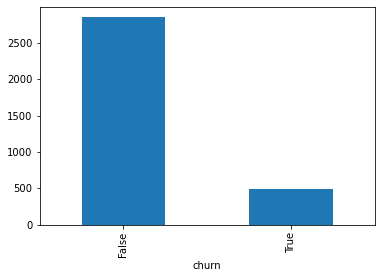

In [4]:
df.groupby("churn")["phone number"].count().plot(kind='bar') 

# 3.Из диаграммы видно, что в выборке большая часть клиентов - это те, которые отказались от услуг оператора, отсюда можем сделать вывод, что распределение не нормальное.

# 4:

In [5]:
df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
NV     66
CO     66
WA     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [6]:
df["state"].value_counts().shape[0]

51

# Т.к штатов очень много, а преобразовать мы их можем только с помощью getdummies(), то добавлять 51 столбец в таблицу считаю нецелесообразным т.к каждый штат содержит маленькое количество людей, причем различия по штатам очень незначительные, значит какой-либо значимой информации эта фича нам не даст. Уберем ее из таблицы.

# Телефонный номер по логике никак не влияет на таргет ибо по-сути является неким вариантом id пользователя, так что его тоже уберем из таблицы.

In [7]:
df["area code"].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [8]:
df1 = df.drop(["state", "phone number"], axis=1)
df2 = df1.copy()

df2["area code"] = df['area code'].map({408:0,415:1,510:2})
df2["international plan"] = df['international plan'].map({"no":0,"yes":1})
df2["voice mail plan"] = df['voice mail plan'].map({"no":0,"yes":1})
df2["churn"] = df['churn'].map({False:0,True:1})

df2

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,2,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [9]:
df_without_target = df2.drop(["churn"], axis=1)
df_without_target 

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,2,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(df_without_target )
X

array([[ 6.76489464e-01, -8.45700361e-04, -3.27580479e-01, ...,
        -6.01195090e-01, -8.56904953e-02, -4.27932021e-01],
       [ 1.49065047e-01, -8.45700361e-04, -3.27580479e-01, ...,
        -6.01195090e-01,  1.24116860e+00, -4.27932021e-01],
       [ 9.02528501e-01, -8.45700361e-04, -3.27580479e-01, ...,
         2.11533863e-01,  6.97156372e-01, -1.18821850e+00],
       ...,
       [-1.83505538e+00,  1.40851395e+00, -3.27580479e-01, ...,
         6.17898340e-01,  1.38712310e+00,  3.32354453e-01],
       [ 2.08295458e+00,  1.40851395e+00,  3.05268496e+00, ...,
         2.24335625e+00, -1.87695028e+00,  3.32354453e-01],
       [-6.79744752e-01, -8.45700361e-04, -3.27580479e-01, ...,
        -1.94830613e-01,  1.24116860e+00, -1.18821850e+00]])

# 5:

In [12]:
from sklearn.model_selection import train_test_split

y = df2["churn"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=12)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
y_pred = knn.predict(X_valid)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [16]:
knn.score(X_valid, y_valid)

0.872

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_pred)

0.872

# 6.Можем сделать предварительный вывод, что модель с довольно хорошей точностью угадывает значения таргета, но хочется отметить что т.к выборка в большинстве своем состоит из значение таргетинговой переменной "False", то естественно увидев много "фолсов", модель легко научится их угадывать, для дальнейших выводов проведем кросс-валидацию.

# 2).

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, 
                         cv=kf, scoring='accuracy')
print(scores)
mean_score = scores.mean()
print(mean_score)

[0.88905547 0.89205397 0.89055472 0.9039039  0.88288288]
0.8916901909405658


In [19]:
from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors': np.arange(1, 51)}
knn_grid_cv = GridSearchCV(knn, 
                        knn_params, 
                        scoring='accuracy',
                        cv=kf)
knn_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='accuracy')

In [20]:
knn_grid_cv.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [21]:
knn_grid_cv.best_score_

0.8898438576982105

# Лучшее значение - 0.8898438576982105, при количестве соседей - 7.

In [22]:
knn_grid_cv.best_params_

{'n_neighbors': 7}

In [23]:
cv_results_df = pd.DataFrame(knn_grid_cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003978,0.000071,0.042374,0.000438,1,{'n_neighbors': 1},0.862955,0.871520,0.858672,0.871245,0.877682,0.868415,0.006757,25
1,0.003895,0.000127,0.044211,0.000221,2,{'n_neighbors': 2},0.847966,0.882227,0.895075,0.864807,0.890558,0.876126,0.017468,12
2,0.003889,0.000046,0.060944,0.032383,3,{'n_neighbors': 3},0.856531,0.892934,0.899358,0.881974,0.909871,0.888134,0.018211,3
3,0.003889,0.000083,0.045981,0.000362,4,{'n_neighbors': 4},0.850107,0.882227,0.903640,0.866953,0.896996,0.879985,0.019578,7
4,0.003911,0.000064,0.046438,0.000550,5,{'n_neighbors': 5},0.869379,0.892934,0.901499,0.873391,0.909871,0.889415,0.015717,2
5,0.003842,0.000030,0.046325,0.000212,6,{'n_neighbors': 6},0.850107,0.880086,0.901499,0.875536,0.894850,0.880416,0.017863,6
6,0.003931,0.000114,0.046824,0.000345,7,{'n_neighbors': 7},0.865096,0.886510,0.912206,0.877682,0.907725,0.889844,0.017840,1
7,0.003896,0.000033,0.047249,0.000461,8,{'n_neighbors': 8},0.850107,0.875803,0.901499,0.873391,0.894850,0.879130,0.018077,8
8,0.003879,0.000022,0.047542,0.000351,9,{'n_neighbors': 9},0.850107,0.888651,0.907923,0.873391,0.905579,0.885130,0.021515,4
9,0.003843,0.000029,0.047387,0.000213,10,{'n_neighbors': 10},0.847966,0.886510,0.901499,0.866953,0.888412,0.878268,0.018744,10


Text(0, 0.5, 'test_score')

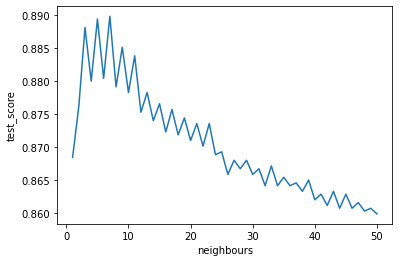

In [24]:
plt.plot(cv_results_df['param_n_neighbors'], cv_results_df['mean_test_score'])
plt.xlabel('neighbours')
plt.ylabel('test_score')

# Так как у нас бинарный таргет, и один класс гораздо превосходит по мощности второй, то лучше бы было использовать метрику f1, сделаем тесты с ней и проанализируем полученные результаты:

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_f1 = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_f1, X, y, 
                         cv=kf, scoring='f1')
print(scores)
mean_score = scores.mean()
print(mean_score)

[0.48611111 0.44615385 0.53503185 0.40740741 0.49350649]
0.4736421410625232


In [26]:
from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors': np.arange(1, 51)}
knn_grid_cv_f1 = GridSearchCV(knn, 
                        knn_params, 
                        scoring='f1',
                        cv=kf)
knn_grid_cv_f1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='f1')

In [27]:
knn_grid_cv_f1.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn_grid_cv_f1.best_score_

0.49628078753156357

# Лучшее значение - 0.49628078753156357, при количестве соседей - 3.

In [29]:
knn_grid_cv_f1.best_params_

{'n_neighbors': 3}

In [30]:
cv_f1_results_df = pd.DataFrame(knn_grid_cv_f1.cv_results_)
cv_f1_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003903,0.000058,0.042879,0.000123,1,{'n_neighbors': 1},0.483871,0.552239,0.400000,0.473684,0.495575,0.481074,0.048806,2
1,0.003870,0.000038,0.046069,0.001336,2,{'n_neighbors': 2},0.236559,0.421053,0.309859,0.307692,0.320000,0.319033,0.059032,9
2,0.003864,0.000023,0.046181,0.000568,3,{'n_neighbors': 3},0.361905,0.576271,0.494624,0.495413,0.553191,0.496281,0.074428,1
3,0.003845,0.000049,0.046399,0.000213,4,{'n_neighbors': 4},0.239130,0.421053,0.347826,0.295455,0.384615,0.337616,0.064423,7
4,0.003938,0.000138,0.047170,0.000318,5,{'n_neighbors': 5},0.396040,0.537037,0.410256,0.404040,0.500000,0.449475,0.057754,3
5,0.003860,0.000082,0.047534,0.000272,6,{'n_neighbors': 6},0.222222,0.391304,0.323529,0.340909,0.328767,0.321346,0.055068,8
6,0.003850,0.000077,0.047965,0.000451,7,{'n_neighbors': 7},0.350515,0.453608,0.467532,0.400000,0.469136,0.428158,0.046257,4
7,0.003816,0.000041,0.047922,0.000144,8,{'n_neighbors': 8},0.222222,0.340909,0.323529,0.321839,0.328767,0.307453,0.043135,10
8,0.003813,0.000031,0.048289,0.000327,9,{'n_neighbors': 9},0.239130,0.458333,0.394366,0.365591,0.435897,0.378664,0.076824,5
9,0.003851,0.000024,0.048869,0.000407,10,{'n_neighbors': 10},0.202247,0.417582,0.303030,0.279070,0.257143,0.291815,0.071176,12


Text(0, 0.5, 'test_score')

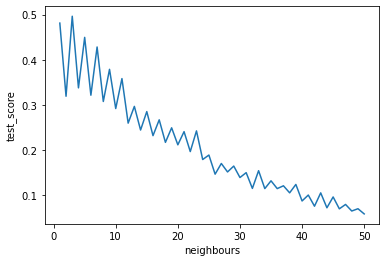

In [31]:
plt.plot(cv_f1_results_df['param_n_neighbors'], cv_f1_results_df['mean_test_score'])
plt.xlabel('neighbours')
plt.ylabel('test_score')

# Можем сделать вывод что эта метрика подходит нам намного больше т.к accuracy в случае несбалансированных классов категорий не дает адекватную картину того как наш алгоритм будет предсказывать. В свою очередь f1 не зависит от соотношения классов и подходит нам больше.

# 3).

# 1:

In [32]:
knn_weights = KNeighborsClassifier(n_neighbors=7, weights = "distance")
knn_weights.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [33]:
p_weights = {"p": np.linspace(1,10, 200)}
knn_weights_cv = GridSearchCV(knn_weights, p_weights, scoring="accuracy", cv = kf)
knn_weights_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=7, weights='distance'),
             param_grid={'p': array([ 1.        ,  1.04522613,  1.09045226,  1.13567839,  1.18090452,
        1.22613065,  1.27135678,  1.31658291,  1.36180905,  1.40703518,
        1.45226131,  1.49748744,  1.54271357,  1.5879397 ,  1.63316583,
        1.67839196,  1.72361809,  1.76884422,  1.81407035...
        8.46231156,  8.50753769,  8.55276382,  8.59798995,  8.64321608,
        8.68844221,  8.73366834,  8.77889447,  8.8241206 ,  8.86934673,
        8.91457286,  8.95979899,  9.00502513,  9.05025126,  9.09547739,
        9.14070352,  9.18592965,  9.23115578,  9.27638191,  9.32160804,
        9.36683417,  9.4120603 ,  9.45728643,  9.50251256,  9.54773869,
        9.59296482,  9.63819095,  9.68341709,  9.72864322,  9.77386935,
        9.81909548,  9.86432161,  9.90954774,  9.95477387, 10.        ])},
             scoring='accuracy')

# 2:

In [34]:
knn_weights_cv.best_estimator_

KNeighborsClassifier(n_neighbors=7, p=1.7236180904522613, weights='distance')

In [35]:
knn_weights_cv.best_score_

0.8906985506979993

# Лучшее значение - 0.8906985506979993, при значении p=1.7236180904522613.

In [36]:
knn_weights_cv_results = pd.DataFrame(knn_weights_cv.cv_results_)
knn_weights_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003776,0.000053,0.032568,0.000137,1,{'p': 1.0},0.856531,0.890792,0.910064,0.877682,0.903433,0.887701,0.019127,26
1,0.004195,0.000420,1.036885,0.021689,1.04523,{'p': 1.0452261306532664},0.856531,0.888651,0.907923,0.875536,0.901288,0.885986,0.018435,31
2,0.003921,0.000044,1.019577,0.004919,1.09045,{'p': 1.0904522613065326},0.854390,0.888651,0.907923,0.879828,0.903433,0.886845,0.019107,29
3,0.003939,0.000048,1.037179,0.033151,1.13568,{'p': 1.135678391959799},0.858672,0.890792,0.907923,0.879828,0.903433,0.888130,0.017718,21
4,0.003971,0.000043,1.027568,0.008683,1.1809,{'p': 1.1809045226130652},0.860814,0.890792,0.905782,0.875536,0.903433,0.887272,0.017053,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.003948,0.000082,0.748675,0.011696,9.8191,{'p': 9.819095477386934},0.852248,0.871520,0.886510,0.866953,0.888412,0.873129,0.013337,104
196,0.003904,0.000059,0.757825,0.019114,9.86432,{'p': 9.864321608040202},0.852248,0.871520,0.886510,0.866953,0.888412,0.873129,0.013337,104
197,0.003936,0.000067,0.756824,0.022659,9.90955,{'p': 9.909547738693467},0.850107,0.869379,0.886510,0.866953,0.888412,0.872272,0.014079,185
198,0.003937,0.000043,0.757544,0.011576,9.95477,{'p': 9.954773869346734},0.850107,0.869379,0.886510,0.866953,0.888412,0.872272,0.014079,185


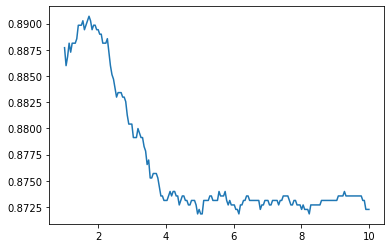

In [37]:
plt.plot(knn_weights_cv_results["param_p"],knn_weights_cv_results["mean_test_score"])

# 4).

In [38]:
from sklearn.neighbors import RadiusNeighborsClassifier

radiusnbrclsf = RadiusNeighborsClassifier(radius=5)
radiusnbrclsf.fit(X_train, y_train)

y_pred = radiusnbrclsf.predict(X_valid)
radiusnbrclsf.score(X_valid, y_valid)

0.858

In [39]:
from sklearn.neighbors import RadiusNeighborsRegressor

radiusnbrregsor = RadiusNeighborsRegressor(radius=5)
radiusnbrregsor.fit(X_train, y_train)

y_pred = radiusnbrregsor.predict(X_valid)
radiusnbrregsor.score(X_valid, y_valid)

0.16767706001567562

In [40]:
from sklearn.neighbors import NearestCentroid

ncentroid = NearestCentroid()
ncentroid.fit(X_train, y_train)

y_pred = ncentroid.predict(X_valid)
ncentroid.score(X_valid, y_valid)

0.724